# M1 Applied Data Science - Coursework Submission
### Steven Dillmann

**MPhil Data Intensive Science | University of Cambridge**

20th December 2023

[sd2022@cam.ac.uk](sd2022@cam.ac.uk)

This notebook was written by Steven Dillmann as part of the coursework submission for the M1 Applied Data Science module in the MPhil in Data Intensive Science at the University of Cambridge. The coursework assignment can be found here: [M1 Applied Data Science - Coursework Assignment](../DIS_MPhil_M1_Coursework.pdf).

In [18]:
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install tabulate  

In [19]:
# Import required libraries
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.cluster import KMeans
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set up matplotlib style and colours
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
plt.style.use('sd2022.mplstyle')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.family'] = 'DejaVu Sans'
sd2022_blue = '#3772ff'
sd2022_red = '#FF033E'
sd2022_green = '#05a45c'
sd2022_purple = '#994d9e' # DIS logo colour
sd2022_orange = '#ff8243'
sd2022_gold = '#cfbd62' 
sd2022_silver = '#C0C0C0'
sd2022_bronze = '#cd7f32'
sd2022_pink = '#df37d6'

# Set up some random seeds
seed_dob = 260699
seed_fave_song = 505
seed_football_number = 11

## Question 1 - Dataset A: Exploration, Dimensionality Reduction and Clustering

In [20]:
# Load dataset A into a dataframe
file_path = '../data/A_NoiseAdded.csv' 
df_A = pd.read_csv(file_path,index_col=0)

(a) Generate density plots for the first 20 features. Include the figure in your report and state what you observe.

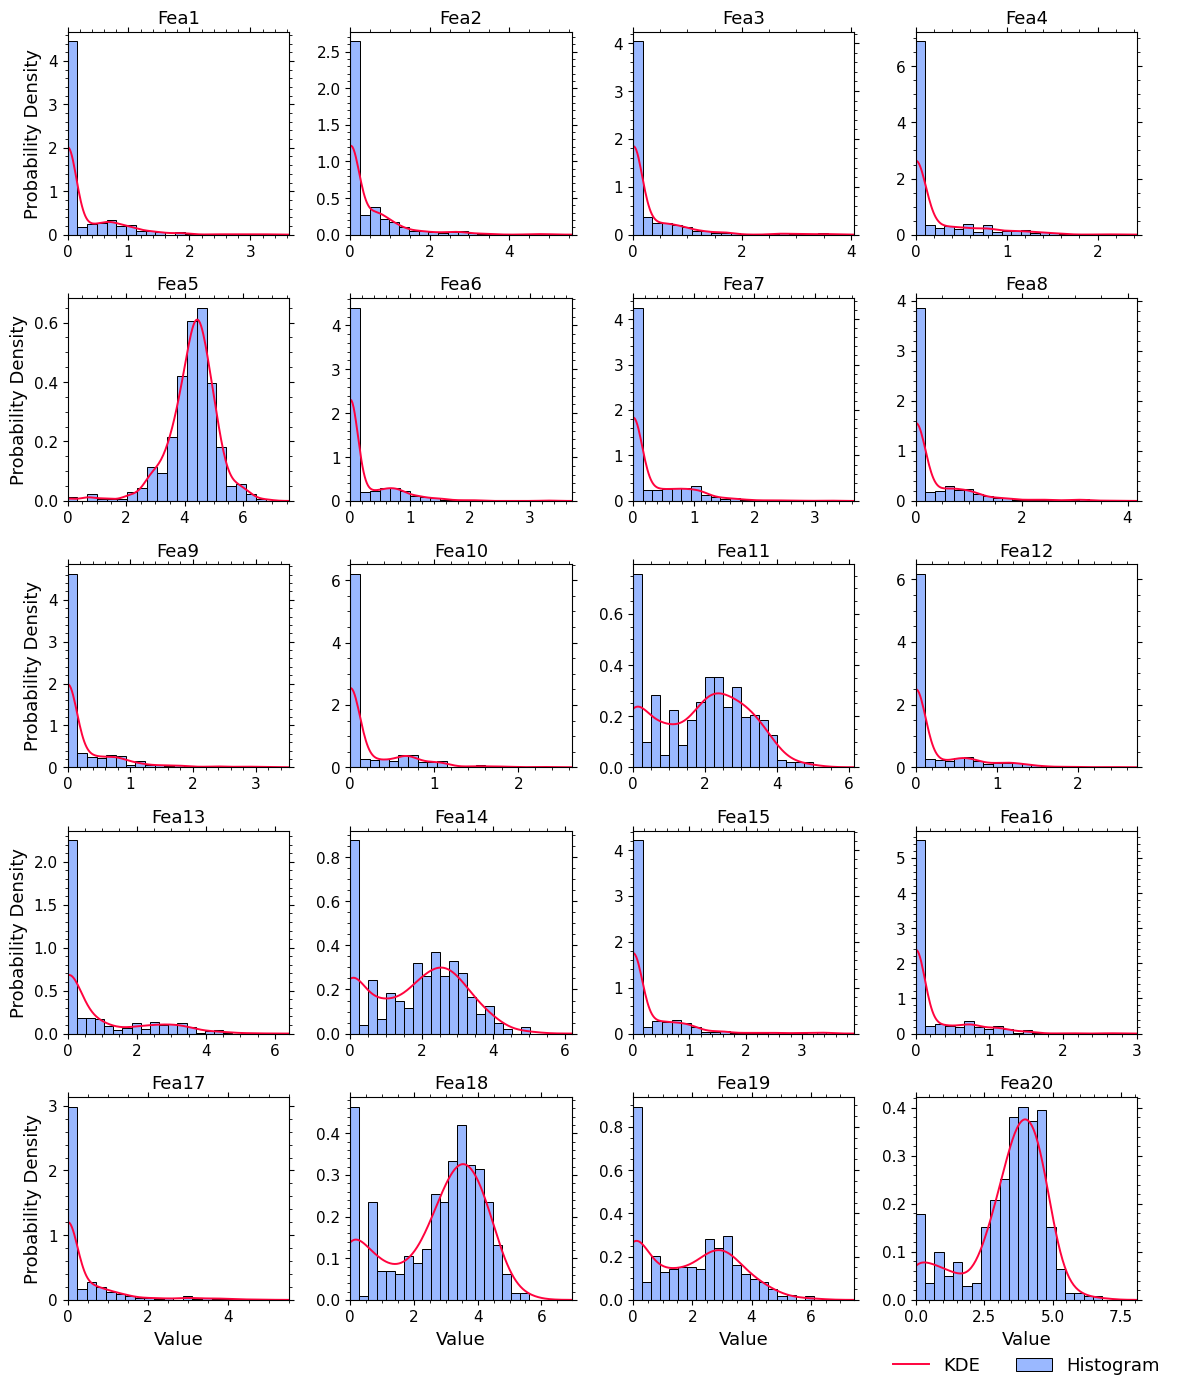

In [21]:
# === Density plots for the first 20 features ======================================================

# Extract the first 20 features
df_features = df_A.iloc[:, 0:20]

# Create density plots for each feature
plt.figure(figsize=(12, 14))  
for i, feature in enumerate(df_features.columns):
    plt.subplot(5, 4, i + 1)  
    sns.histplot(df_features[feature], color=sd2022_blue, alpha = 0.5, stat="density",bins=20, label='Histogram')
    sns.kdeplot(df_features[feature], color=sd2022_red, clip=(0, None), label='KDE')
    plt.title(f'{feature}', size=13)
    plt.xlabel('Value', size=13)
    plt.ylabel('Probability Density', size=13)
    # Remove y-axis label for all but the first column
    if i % 4 != 0:
        plt.ylabel('')
    # Remove x-axis label for all but the bottom row
    if i < 16: 
        plt.xlabel('')

plt.legend(loc='center', bbox_to_anchor=(0.5, -0.325), shadow=True, ncol=2, fontsize=13)
plt.tight_layout() 
plt.show()

(b) Apply PCA to visualise the features in 2D and include this visualisation in your report. Comment on what you observe and refer this back to the density plots.

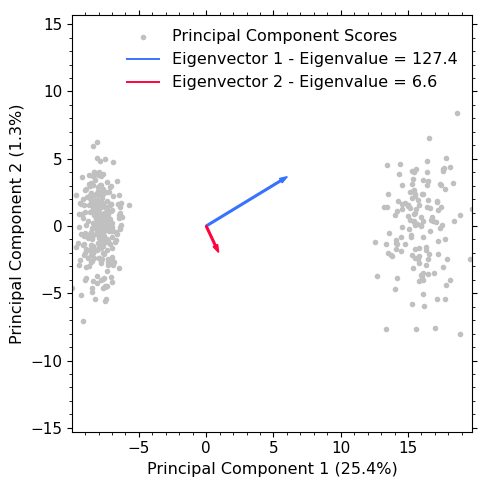

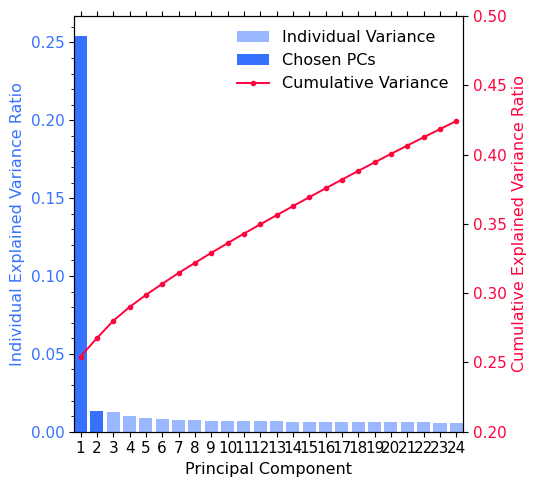

In [22]:
# === PCA on dataset A features ====================================================================

# Standardise the features 
df_features = df_A.drop(columns='classification')
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_features)

# Apply PCA (n_components=2) to the scaled features
pca_model = PCA(n_components=2)
features_pca = pca_model.fit_transform(features_scaled)
df_pca = pd.DataFrame(data=features_pca,columns= ['PC_1', 'PC_2'])  

# Get eigenvectors, eigenvalues and explained variance
eigenvectors = pca_model.components_
eigenvalues = pca_model.explained_variance_
explained_variance = pca_model.explained_variance_ratio_

# Plot the principal component space
plt.figure(figsize=(5,5))
plt.scatter(df_pca['PC_1'], df_pca['PC_2'], color=sd2022_silver, marker = '.')
plt.arrow(0, 0, eigenvectors[0, 0]*100, eigenvectors[0, 1]*100, color=sd2022_blue, width=0.125)
plt.arrow(0, 0, eigenvectors[1, 0]*100, eigenvectors[1, 1]*100, color=sd2022_red, width=0.125)

# Adding legend handles for eigenvectors
scatter_pc_legend = plt.scatter([], [], color=sd2022_silver, marker='.', label='Principal Component Scores')
arrow_PC1 = Line2D([], [], color=sd2022_blue, label='Eigenvector 1 - Eigenvalue = {:.1f}'.format(eigenvalues[0]))
arrow_PC2 = Line2D([], [], color=sd2022_red, label='Eigenvector 2 - Eigenvalue = {:.1f}'.format(eigenvalues[1]))
legend_handles = [scatter_pc_legend, arrow_PC1, arrow_PC2]
plt.legend(handles=legend_handles)
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.1f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.1f}%)')
plt.axis('equal')
plt.show()

# Explore more principal components
pca_more = PCA(n_components=24)
features_pca_more = pca_more.fit_transform(features_scaled)
explained_variance_more = pca_more.explained_variance_ratio_
num_components = len(explained_variance_more)
component_numbers = np.arange(1, num_components + 1)
cumulative_variance = np.cumsum(explained_variance_more)

# Plot the inidividual explained variance
fig, ax1 = plt.subplots(figsize=(5.5, 5))
ax1.bar(component_numbers, explained_variance_more, color=sd2022_blue, alpha=0.5, label='Individual Variance')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Individual Explained Variance Ratio', color=sd2022_blue)
ax1.tick_params(axis='y', labelcolor=sd2022_blue)

# Plot the cumulative explained variance
ax2 = ax1.twinx()
ax2.plot(component_numbers, cumulative_variance, color=sd2022_red, marker='.', label='Cumulative Variance')
ax2.set_ylabel('Cumulative Explained Variance Ratio', color=sd2022_red)
ax2.tick_params(axis='y', labelcolor=sd2022_red)
ax2.set_ylim(bottom=0.2, top=0.5)

# Plot the chosen number of components
ax1.bar(component_numbers[:2], explained_variance_more[:2], color= sd2022_blue, label='Chosen PCs')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right')

plt.xticks(component_numbers)
plt.minorticks_off()
plt.show()

(c) Partition the data into two training sets of equal sizes. Apply k-means clustering to each training set, using the default scikit-learn parameters. In each case, the unused data can be mapped onto the learned clusters. In your report, briefly explain how and why this is possible. Compare both clusterings for the combined training set, using a contingency table.

In [23]:
# === Centroid Matching Function ===================================================================

def centroid_matcher(centroids1, centroids2):
    """Matches centroids from two sets of clusters based on the minimum distance
    between them in a greedy one-to-one matching.

    The function takes two sets of centroids and returns the indices of the
    matched centroids. The function uses the scipy.spatial.distance_matrix
    function to calculate the distance matrix between the centroids and then
    iterates through the rows of the distance matrix to find the closest
    centroid in the second set of clusters. The function then appends the
    indices of the matched centroids to two lists and sets the distance between
    the matched centroids to infinity to avoid rematching.

    Args:
        centroids1 (numpy.ndarray): Centroids from the first set of clusters.
        centroids2 (numpy.ndarray): Centroids from the second set of clusters.

    Returns:
        match_ix1 (list): List of indices of the matched centroids from the 
        first set of clusters.
        match_ix2 (list): List of indices of the matched centroids from the 
        second set of clusters.

    References:
        Marek Slipski, Armin Kleinboehl, Steven Dillmann, David M Kass, Jason 
        Reimuller, Mark Wronkiewicz, and Gary Doran. The Cloudspotting on Mars 
        Citizen Science Project: Seasonal and spatial cloud distributions 
        observed by the mars climate sounder. Icarus, page 115777, 2023.
    """
    # Initialise lists to store the matched indices
    match_ix1 =[]
    match_ix2 =[]
    # Calculate the distance matrix between the centroids
    distances = distance_matrix(centroids1, centroids2)
    for index1 in range(len(centroids1)):
        # Find the index of the closest centroid in the second set of clusters
        index2 = np.argmin(distances[index1,:])
        # Append the indices to the lists of matched indices
        match_ix1.append(index1)
        match_ix2.append(index2)
        # Set the matched centroid distances to infinity to avoid rematching
        distances[index1,:] = np.inf
        distances[:,index2] = np.inf
    return match_ix1, match_ix2

In [24]:
# === K-means clustering with k=8 (default) ========================================================

# Split PCA data into two equal size training sets 
df_1, df_2 = train_test_split(df_pca, train_size=0.5, random_state=seed_dob)

# Apply K-means clustering to training set 1 with default parameters
kmeans_model_1 = KMeans(random_state=seed_dob, init='k-means++')
kmeans_model_1.fit(df_1)
cluster_labels1 = kmeans_model_1.labels_
centroids1 = kmeans_model_1.cluster_centers_

# Apply K-means clustering to training set 2 with default parameters
kmeans_model_2 = KMeans(random_state=seed_dob, init='k-means++')
kmeans_model_2.fit(df_2)
cluster_labels2 = kmeans_model_2.labels_
centroids2 = kmeans_model_2.cluster_centers_

# Predict clusters for unused data using both models 
clusters_model1_train2 = kmeans_model_1.predict(df_pca)
clusters_model2_train1 = kmeans_model_2.predict(df_pca)

# # Print contingency table for the two clusterings
# contingency_table = pd.crosstab(clusters_model2_train1, clusters_model1_train2)
# print(contingency_table)

# Realign cluster labels using centroid matching indices
match_ix1, match_ix2 = centroid_matcher(centroids1, centroids2)
aligned_labels_model1 = np.array([match_ix2[label] for label in clusters_model1_train2])
aligned_labels_model2 = np.array([match_ix1[label] for label in clusters_model2_train1])

# Print contingency table for the realigned clusterings
print("Contingency table comparing clusters from Model 1 and Model 2:")
contingency_table_realigned = pd.crosstab(aligned_labels_model2, aligned_labels_model1)
print(contingency_table_realigned)

# Print adjusted rand index as a measure of cluster agreement
ari = adjusted_rand_score(aligned_labels_model2, aligned_labels_model1)
print(f"Adjusted Rand Index: {ari:.3f}")


Contingency table comparing clusters from Model 1 and Model 2:
col_0   0   1   2   3   4   5   6   7
row_0                                
0      56   0   0   0   0   0  50   0
1       0  24   0   0   0   0   0   0
2       0   0  29   0   0   0   0   1
3       0   0   0  36   0   0  39   0
4       0   0   0   0  25   0   0   0
5       0   0   5   0   0  22   0   0
6      43   0   0   0  23   0   0   0
7       0   3   2   0   0   0   0  50
Adjusted Rand Index: 0.510



(d) Comment on the size of the clusters and the cluster stability in your report, and repeat k-means clustering with a different number of clusters.

Contingency table comparing clusters from Random State = 14 and Random State = 24:
col_0   0   1   2   3   4   5   6   7
row_0                                
0      31   0   0   0   0   0   0  31
1       0  41   0   0  12   0   0   0
2       0   0  54   0   0   0  20   0
3       0   0   0   8   0   0   0   0
4       0   0   0  14  23   0   0   0
5       0  11   0   0   0  27   0   0
6       0   0   0   0   0   0  28   0
7       0   0  46   0   0   0   0  62
Adjusted Rand Index: 0.475

Contingency table comparing clusters from Random State = 15 and Random State = 25:
col_0   0   1   2   3   4   5   6   7
row_0                                
0      26   0  12   0   0   5   0   0
1       0  62   0   0  47   0   0   0
2       0   0   0   0   0   1   0  24
3       0   0   0  25   0   0   0   0
4       0   0   0  23  53   0   0   0
5       0   0  28   0   0  21   0  11
6       0  30   0   0   0   0  32   0
7       8   0   0   0   0   0   0   0
Adjusted Rand Index: 0.442

Contingency table 

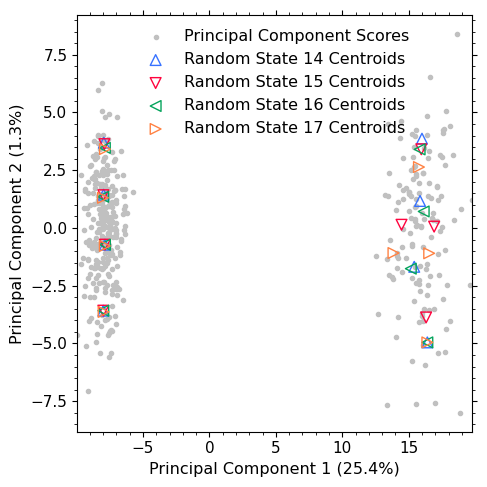

In [25]:
# === Cluster stability analysis ===================================================================

# Copy the PCA data and split into two equal size training sets
df_try = df_pca.copy()
df_try1, df_try2 = train_test_split(df_try, train_size=0.5, random_state=seed_dob)

# Plot the principal component space 
plt.figure(figsize=(5, 5))
plt.scatter(df_pca['PC_1'], df_pca['PC_2'], color=sd2022_silver, marker = '.', label='Principal Component Scores')

# Define colours and markers for the centroids 
colors = [sd2022_blue, sd2022_red, sd2022_green, sd2022_orange]
markers = ['^', 'v', '<', '>']

# Loop through 4 random states
for i in range(4):
    # Apply K-means clustering to training set 1 with default parameters
    kmeans_try_1 = KMeans(random_state=i+14)
    kmeans_try_1.fit(df_try1)
    cluster_labels_try1 = kmeans_try_1.labels_
    centroids_try1 = kmeans_try_1.cluster_centers_

    # Apply K-means clustering to training set 2 with default parameters
    kmeans_try_2 = KMeans(random_state=i+24)
    kmeans_try_2.fit(df_try2)
    cluster_labels_try2 = kmeans_try_2.labels_
    centroids_try2 = kmeans_try_2.cluster_centers_

    # Predict clusters for unused data using both models
    clusters_try12 = kmeans_try_1.predict(df_try)
    clusters_try21 = kmeans_try_2.predict(df_try)

    # Realign cluster labels using centroid matching indices
    match_ix1, match_ix2 = centroid_matcher(centroids_try1, centroids_try2)
    aligned_labels_try1 = np.array([match_ix2[label] for label in clusters_try12])
    aligned_labels_try2 = np.array([match_ix1[label] for label in clusters_try21])

    # Print contingency table for the clusterings
    print(f"Contingency table comparing clusters from Random State = {i+14} and Random State = {i+24}:")
    contingency_table_try = pd.crosstab(aligned_labels_try2, aligned_labels_try1)
    print(contingency_table_try)

    # Print adjusted rand index as a measure of cluster agreement
    ari = adjusted_rand_score(aligned_labels_try2, aligned_labels_try1)
    print(f"Adjusted Rand Index: {ari:.3f}\n")

    # Plot the centroids
    plt.scatter(centroids_try1[:,0], centroids_try1[:,1], marker = markers[i], color = "none", edgecolor = colors[i], label=f'Random State {i+14} Centroids', s=60)

plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.1f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.1f}%)')
plt.legend(loc='upper center')
plt.tight_layout()
plt.show()



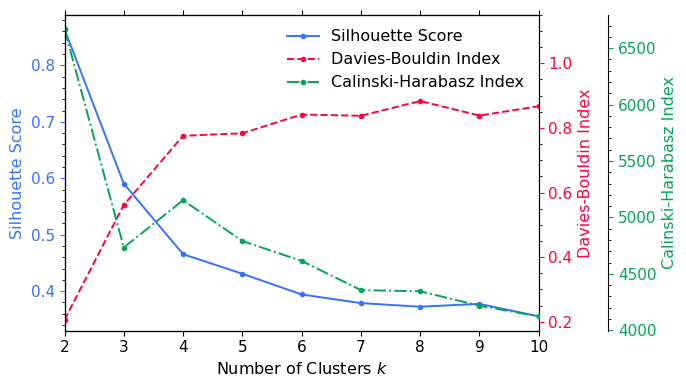

Optimal number of clusters based on Silhouette score: 2
Maximum Silhouette score: 0.864
Optimal number of clusters based on Davies-Bouldin index: 2
Minimum Davies-Bouldin index: 0.206
Optimal number of clusters based on Calinski-Harabasz index: 2
Maximum Calinski-Harabasz index: 6667.851


In [26]:
# === Find optimal number of clusters ==============================================================

# Calculate silhouette scores, Davies-Bouldin scores, and Calinski-Harabasz scores for different values of k
silhouette_scores = []
db_scores = []
ch_scores = []
k_list = list(range(2, 11))
for k in k_list:
    # Apply K-means clustering with k clusters
    kmeans = KMeans(n_clusters=k, random_state=seed_dob, init='k-means++')
    cluster_labels = kmeans.fit_predict(df_pca)
    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    # Calculate Davies-Bouldin score
    db_index = davies_bouldin_score(df_pca, cluster_labels)
    db_scores.append(db_index)
    # Calculate Calinski-Harabasz score
    ch_index = calinski_harabasz_score(df_pca, cluster_labels)
    ch_scores.append(ch_index)

# Plot silhouette scores, Davies-Bouldin scores, and Calinski-Harabasz scores for different values of k
fig, ax1 = plt.subplots(figsize=(7, 4))

ax1.plot(k_list, silhouette_scores, marker='.', linestyle='-', color=sd2022_blue, label='Silhouette Score')
ax1.set_xlabel('Number of Clusters $k$')
ax1.set_ylabel('Silhouette Score', color=sd2022_blue)
ax1.tick_params('y', colors=sd2022_blue)

ax2 = ax1.twinx()
ax2.plot(k_list, db_scores, marker='.', linestyle='--', color=sd2022_red, label='Davies-Bouldin Index')
ax2.set_ylabel('Davies-Bouldin Index', color=sd2022_red)
ax2.tick_params('y', colors=sd2022_red)
ax2.set_ylim(top = 1.15)

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 50))  
ax3.plot(k_list, ch_scores, marker='.', linestyle='-.', color=sd2022_green, label='Calinski-Harabasz Index')
ax3.set_ylabel('Calinski-Harabasz Index', color=sd2022_green)
ax3.tick_params('y', colors=sd2022_green)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines = lines1 + lines2 + lines3
labels = labels1 + labels2 + labels3
ax1.legend(lines, labels, loc='upper right')

plt.xticks(k_list)
ax = plt.gca()
ax.xaxis.set_minor_locator(plt.NullLocator())
plt.show()

# Find the optimal number of clusters based on different metrics
max_silhouette_score = max(silhouette_scores)
optimal_k_silhouette = k_list[silhouette_scores.index(max_silhouette_score)]
print(f'Optimal number of clusters based on Silhouette score: {optimal_k_silhouette}')
print(f'Maximum Silhouette score: {max_silhouette_score:.3f}')

min_db_score = min(db_scores)
optimal_k_db = k_list[db_scores.index(min_db_score)]
print(f'Optimal number of clusters based on Davies-Bouldin index: {optimal_k_db}')
print(f'Minimum Davies-Bouldin index: {min_db_score:.3f}')

max_ch_score = max(ch_scores)
optimal_k_ch = k_list[ch_scores.index(max_ch_score)]
print(f'Optimal number of clusters based on Calinski-Harabasz index: {optimal_k_ch}')
print(f'Maximum Calinski-Harabasz index: {max_ch_score:.3f}')


In [27]:
# === K-means clustering with k=2 =============================================

# Split data into two equal size training sets 
df_3, df_4 = train_test_split(df_pca, train_size=0.5, random_state=seed_dob)

# Apply K-means clustering to training set 1 with k=2
kmeans_model_3 = KMeans(n_clusters=2, random_state=seed_football_number, init='k-means++')
kmeans_model_3.fit(df_3)
cluster_labels3 = kmeans_model_3.labels_
centroids3 = kmeans_model_3.cluster_centers_

# Apply K-means clustering to training set 2 with k=2
kmeans_model_4 = KMeans(n_clusters=2, random_state=seed_fave_song, init='k-means++')
kmeans_model_4.fit(df_4)
cluster_labels4 = kmeans_model_4.labels_

# Predict clusters for unused data using both models
clusters_model3_train4 = kmeans_model_3.predict(df_pca)
clusters_model4_train3 = kmeans_model_4.predict(df_pca)
centroids4 = kmeans_model_4.cluster_centers_

# Realign cluster labels using centroid matching indices
match_ix3, match_ix4 = centroid_matcher(centroids3, centroids4)
aligned_labels_model3 = np.array([match_ix4[label] for label in clusters_model3_train4])
aligned_labels_model4 = np.array([match_ix3[label] for label in clusters_model4_train3])

# Print contingency table for the realigned clusterings
print("Contingency table comparing clusters from Model 3 and Model 4:")
contingency_table_realigned = pd.crosstab(aligned_labels_model3, aligned_labels_model4)
print(contingency_table_realigned)

# Print adjusted rand index as a measure of cluster agreement
ari = adjusted_rand_score(aligned_labels_model3, aligned_labels_model4)
print(f"Adjusted Rand Index: {ari:.3f}")

Contingency table comparing clusters from Model 3 and Model 4:
col_0    0    1
row_0          
0      272    0
1        0  136
Adjusted Rand Index: 1.000


(e) Identify the k-means clusters within the PCA figure. Comment on the differences between performing (i) k-means followed by PCA visualisation or (ii) PCA followed by k-means. Which do you think is better in general?

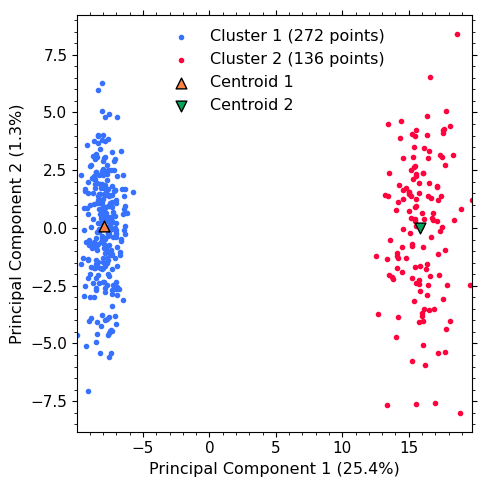

In [28]:
# === PCA first, then K-means clustering (k=2) =====================================================

# Assign clusters to the PCA dataframe (first, then second step)
df_clusters = df_pca.copy()
df_clusters['Clusters'] = kmeans_model_3.predict(df_clusters)
df_cluster1 = df_clusters[df_clusters['Clusters'] == 0]
df_cluster2 = df_clusters[df_clusters['Clusters'] == 1]
num_points_cluster1 = len(df_cluster1)
num_points_cluster2 = len(df_cluster2)

# Plot the clusters and centroids 
plt.figure(figsize=(5, 5))
plt.scatter(df_cluster1['PC_1'], df_cluster1['PC_2'], color=sd2022_blue, marker = '.', label=f'Cluster 1 ({num_points_cluster1} points)')
plt.scatter(df_cluster2['PC_1'], df_cluster2['PC_2'], color=sd2022_red, marker = '.', label=f'Cluster 2 ({num_points_cluster2} points)')
plt.scatter(centroids3[0, 0], centroids3[0, 1], marker='^', color=sd2022_orange, edgecolor = 'black', label='Centroid 1', s=60)
plt.scatter(centroids3[1, 0], centroids3[1, 1], marker='v', color=sd2022_green, edgecolor = 'black', label='Centroid 2', s=60)
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.1f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.1f}%)')
plt.legend(loc='upper center')
plt.show()

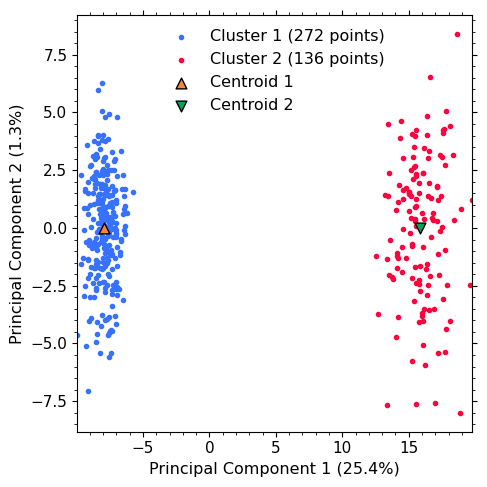

In [29]:
# === K-means clustering first, then PCA (k=2) =====================================================

# Apply K-means clustering to data with k=2 (first step)
kmeans_model_5 = KMeans(n_clusters=2, random_state=seed_fave_song, init='k-means++')
kmeans_model_5.fit(features_scaled)
cluster_labels5 = kmeans_model_5.labels_
centroids5 = kmeans_model_5.cluster_centers_
centroids_in_pca_space = pca_model.transform(centroids5)

# Assign clusters to the PCA dataframe (second step)
df_clusters_knn_first = df_pca.copy()
df_clusters_knn_first['Clusters'] = cluster_labels5
df_cluster_knn_first_1 = df_clusters_knn_first[df_clusters_knn_first['Clusters'] == 0]
df_cluster_knn_first_2 = df_clusters_knn_first[df_clusters_knn_first['Clusters'] == 1]
num_points_knn_first_cluster1 = len(df_cluster1)
num_points_knn_first_cluster2 = len(df_cluster2)

# Plot the principal components
plt.figure(figsize=(5, 5))

# Plot the clusters and centroids
plt.scatter(df_cluster1['PC_1'], df_cluster1['PC_2'], color=sd2022_blue, marker = '.', label=f'Cluster 1 ({num_points_knn_first_cluster1} points)')
plt.scatter(df_cluster2['PC_1'], df_cluster2['PC_2'], color=sd2022_red, marker = '.', label=f'Cluster 2 ({num_points_knn_first_cluster2} points)')
plt.scatter(centroids_in_pca_space[0, 0], centroids_in_pca_space[0, 1], marker='^', color=sd2022_orange, edgecolor = 'black', label='Centroid 1', s=60)
plt.scatter(centroids_in_pca_space[1, 0], centroids_in_pca_space[1, 1], marker='v', color=sd2022_green, edgecolor = 'black', label='Centroid 2', s=60)
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.1f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.1f}%)')
plt.legend(loc='upper center')
plt.show()



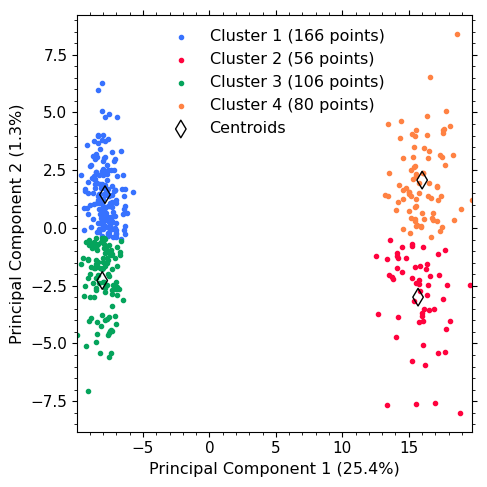

In [30]:
# === PCA first, then K-means clustering (k=4) =====================================================

# PCA (first step)
df_clusters_pca_knn = df_pca.copy()

# Apply K-means clustering to data with k=4 (second step)
kmeans_model_6 = KMeans(n_clusters=4, random_state=seed_football_number, init='k-means++')
kmeans_model_6.fit(df_clusters_pca_knn)
cluster_labels6 = kmeans_model_6.labels_
centroids6 = kmeans_model_6.cluster_centers_

# Assign clusters to the PCA dataframe
df_clusters_pca_knn['Clusters'] = kmeans_model_6.predict(df_clusters_pca_knn)
df_cluster_pca_knn1 = df_clusters_pca_knn[df_clusters_pca_knn['Clusters'] == 0]
df_cluster_pca_knn2 = df_clusters_pca_knn[df_clusters_pca_knn['Clusters'] == 1]
df_cluster_pca_knn3 = df_clusters_pca_knn[df_clusters_pca_knn['Clusters'] == 2]
df_cluster_pca_knn4 = df_clusters_pca_knn[df_clusters_pca_knn['Clusters'] == 3]
num_points_pca_knn_cluster1 = len(df_cluster_pca_knn1)
num_points_pca_knn_cluster2 = len(df_cluster_pca_knn2)
num_points_pca_knn_cluster3 = len(df_cluster_pca_knn3)
num_points_pca_knn_cluster4 = len(df_cluster_pca_knn4)

# Plot the clusters and centroids
plt.figure(figsize=(5, 5))
plt.scatter(df_cluster_pca_knn1['PC_1'], df_cluster_pca_knn1['PC_2'], color=sd2022_blue, marker = '.', label=f'Cluster 1 ({num_points_pca_knn_cluster1} points)')
plt.scatter(df_cluster_pca_knn2['PC_1'], df_cluster_pca_knn2['PC_2'], color=sd2022_red, marker = '.', label=f'Cluster 2 ({num_points_pca_knn_cluster2} points)')
plt.scatter(df_cluster_pca_knn3['PC_1'], df_cluster_pca_knn3['PC_2'], color=sd2022_green, marker = '.', label=f'Cluster 3 ({num_points_pca_knn_cluster3} points)')
plt.scatter(df_cluster_pca_knn4['PC_1'], df_cluster_pca_knn4['PC_2'], color=sd2022_orange, marker = '.', label=f'Cluster 4 ({num_points_pca_knn_cluster4} points)')
plt.scatter(centroids6[:, 0], centroids6[:, 1], marker='d', color= "none", edgecolor = 'black', label='Centroids', s=80)
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.1f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.1f}%)')
plt.legend(loc='upper center')
plt.show()

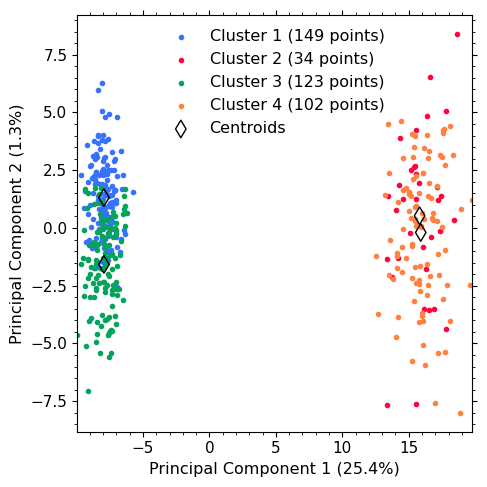

In [31]:
# === K-means clustering first, then PCA (k=4) =====================================================

# Apply K-means clustering to data with k=4 (first step)
kmeans_model_7 = KMeans(n_clusters=4, random_state=seed_football_number, init='k-means++')
kmeans_model_7.fit(features_scaled)
cluster_labels7 = kmeans_model_7.labels_
centroids7 = kmeans_model_7.cluster_centers_
centroids_in_pca_space7 = pca_model.transform(centroids7)

# PCA (second step)
df_clusters_knn_pca = df_pca.copy()
df_clusters_knn_pca['Clusters'] = cluster_labels7
df_cluster_knn_pca1 = df_clusters_knn_pca[df_clusters_knn_pca['Clusters'] == 0]
df_cluster_knn_pca2 = df_clusters_knn_pca[df_clusters_knn_pca['Clusters'] == 1]
df_cluster_knn_pca3 = df_clusters_knn_pca[df_clusters_knn_pca['Clusters'] == 2]
df_cluster_knn_pca4 = df_clusters_knn_pca[df_clusters_knn_pca['Clusters'] == 3]
num_points_knn_pca_cluster1 = len(df_cluster_knn_pca1)
num_points_knn_pca_cluster2 = len(df_cluster_knn_pca2)
num_points_knn_pca_cluster3 = len(df_cluster_knn_pca3)
num_points_knn_pca_cluster4 = len(df_cluster_knn_pca4)

# Plot the clusters and centroids
plt.figure(figsize=(5, 5))
plt.scatter(df_cluster_knn_pca1['PC_1'], df_cluster_knn_pca1['PC_2'], color=sd2022_blue, marker = '.', label=f'Cluster 1 ({num_points_knn_pca_cluster1} points)')
plt.scatter(df_cluster_knn_pca2['PC_1'], df_cluster_knn_pca2['PC_2'], color=sd2022_red, marker = '.', label=f'Cluster 2 ({num_points_knn_pca_cluster2} points)')
plt.scatter(df_cluster_knn_pca3['PC_1'], df_cluster_knn_pca3['PC_2'], color=sd2022_green, marker = '.', label=f'Cluster 3 ({num_points_knn_pca_cluster3} points)')
plt.scatter(df_cluster_knn_pca4['PC_1'], df_cluster_knn_pca4['PC_2'], color=sd2022_orange, marker = '.', label=f'Cluster 4 ({num_points_knn_pca_cluster4} points)')
plt.scatter(centroids_in_pca_space7[:, 0], centroids_in_pca_space7[:, 1], marker = 'd', color= "none", edgecolor = 'black', label='Centroids', s=80)
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.1f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.1f}%)')
plt.legend(loc='upper center')
plt.show()